In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.rename(columns={'W' : 'Wins','R' : 'Runs Scored','AB' : 'At Bat','H' : 'Hits','2B' : 'Doubles','3B' : 'Triples','HR' : 'Home Runs','BB' : 'Base on Balls','SO' : 'Strike Outs','SB' : 'Stolen Base','RA' : 'Runs Average','ER' : 'Earned Runs', 'ERA' : 'Earned Run Average','CG' : 'Complete Game','SHO' : 'Shut Outs','SV' : 'Saves','E' : 'Errors'},inplace=True)

In [4]:
df.shape

(30, 17)

In [5]:
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.tail()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
df.sample(5)

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [8]:
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In [10]:
df.dtypes

Wins                    int64
Runs Scored             int64
At Bat                  int64
Hits                    int64
Doubles                 int64
Triples                 int64
Home Runs               int64
Base on Balls           int64
Strike Outs             int64
Stolen Base             int64
Runs Average            int64
Earned Runs             int64
Earned Run Average    float64
Complete Game           int64
Shut Outs               int64
Saves                   int64
Errors                  int64
dtype: object

Checking Null Values

<Axes: >

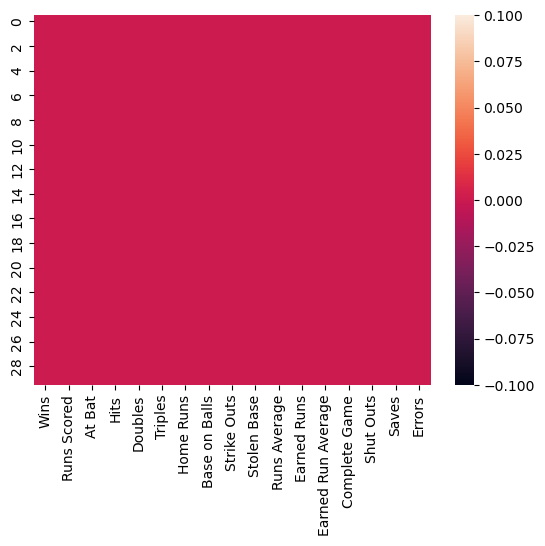

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

<Axes: >

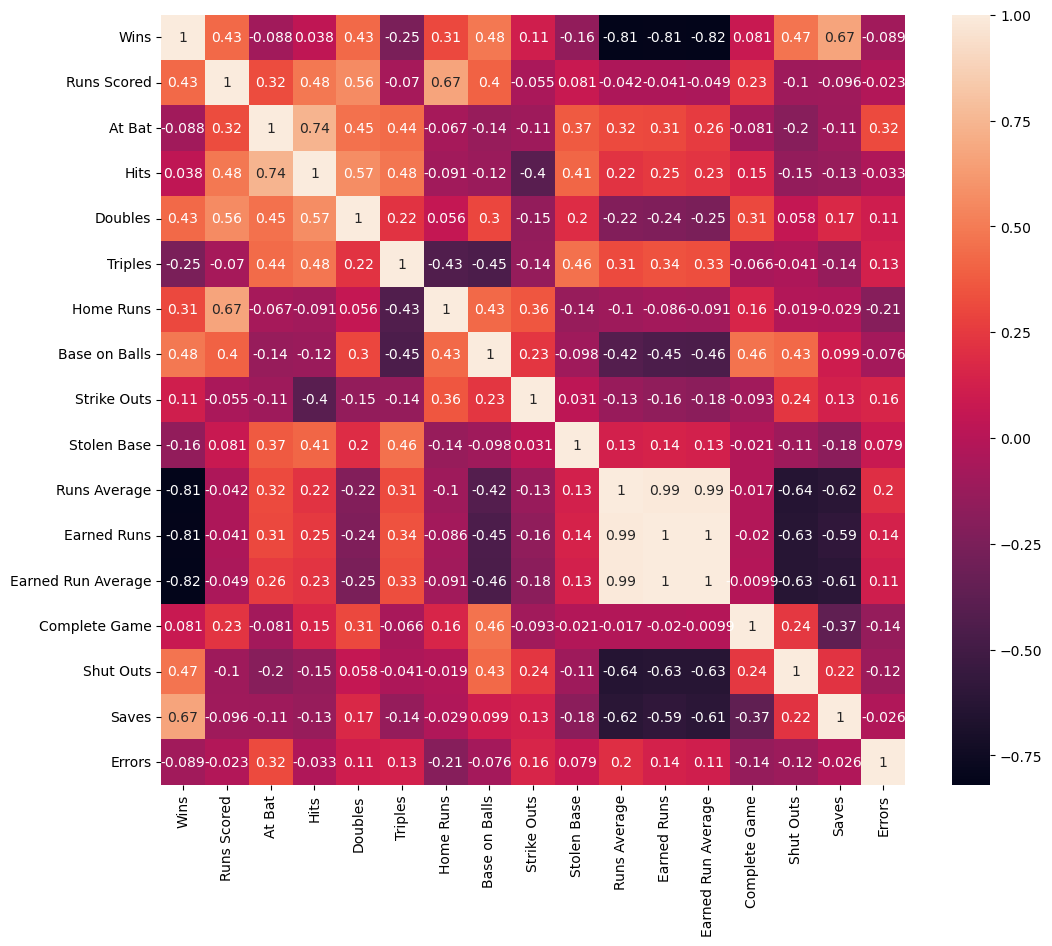

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

Checking the Outliers

Wins                     Axes(0.125,0.712609;0.133621x0.167391)
Runs Scored           Axes(0.285345,0.712609;0.133621x0.167391)
At Bat                 Axes(0.44569,0.712609;0.133621x0.167391)
Hits                  Axes(0.606034,0.712609;0.133621x0.167391)
Doubles               Axes(0.766379,0.712609;0.133621x0.167391)
Triples                  Axes(0.125,0.511739;0.133621x0.167391)
Home Runs             Axes(0.285345,0.511739;0.133621x0.167391)
Base on Balls          Axes(0.44569,0.511739;0.133621x0.167391)
Strike Outs           Axes(0.606034,0.511739;0.133621x0.167391)
Stolen Base           Axes(0.766379,0.511739;0.133621x0.167391)
Runs Average              Axes(0.125,0.31087;0.133621x0.167391)
Earned Runs            Axes(0.285345,0.31087;0.133621x0.167391)
Earned Run Average      Axes(0.44569,0.31087;0.133621x0.167391)
Complete Game          Axes(0.606034,0.31087;0.133621x0.167391)
Shut Outs              Axes(0.766379,0.31087;0.133621x0.167391)
Saves                        Axes(0.125,

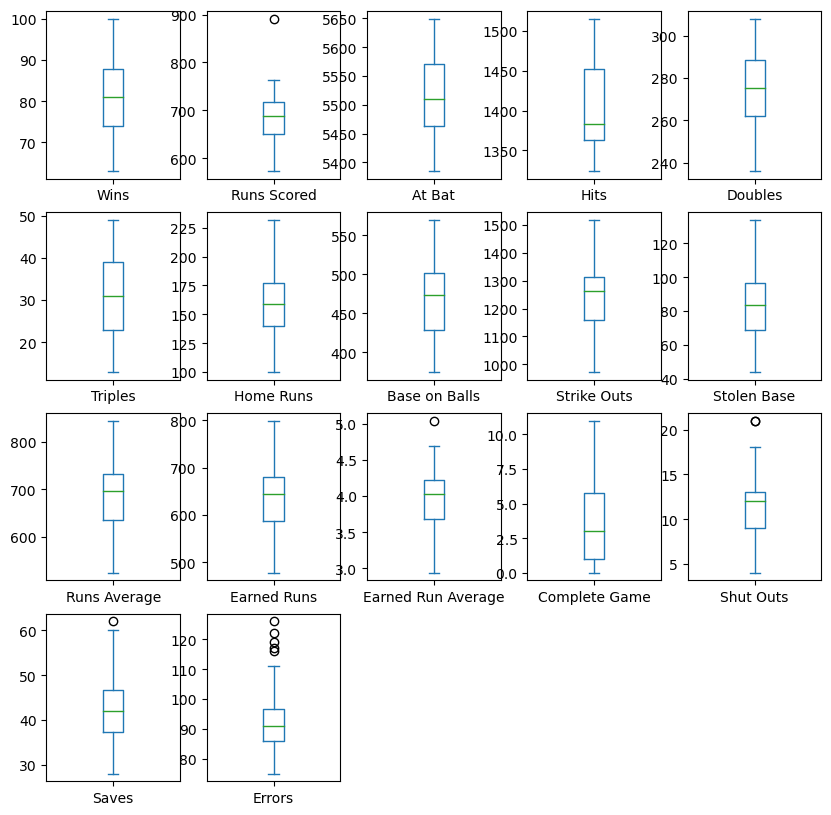

In [14]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

array([[<Axes: title={'center': 'Wins'}>,
        <Axes: title={'center': 'Runs Scored'}>,
        <Axes: title={'center': 'At Bat'}>,
        <Axes: title={'center': 'Hits'}>],
       [<Axes: title={'center': 'Doubles'}>,
        <Axes: title={'center': 'Triples'}>,
        <Axes: title={'center': 'Home Runs'}>,
        <Axes: title={'center': 'Base on Balls'}>],
       [<Axes: title={'center': 'Strike Outs'}>,
        <Axes: title={'center': 'Stolen Base'}>,
        <Axes: title={'center': 'Runs Average'}>,
        <Axes: title={'center': 'Earned Runs'}>],
       [<Axes: title={'center': 'Earned Run Average'}>,
        <Axes: title={'center': 'Complete Game'}>,
        <Axes: title={'center': 'Shut Outs'}>,
        <Axes: title={'center': 'Saves'}>],
       [<Axes: title={'center': 'Errors'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

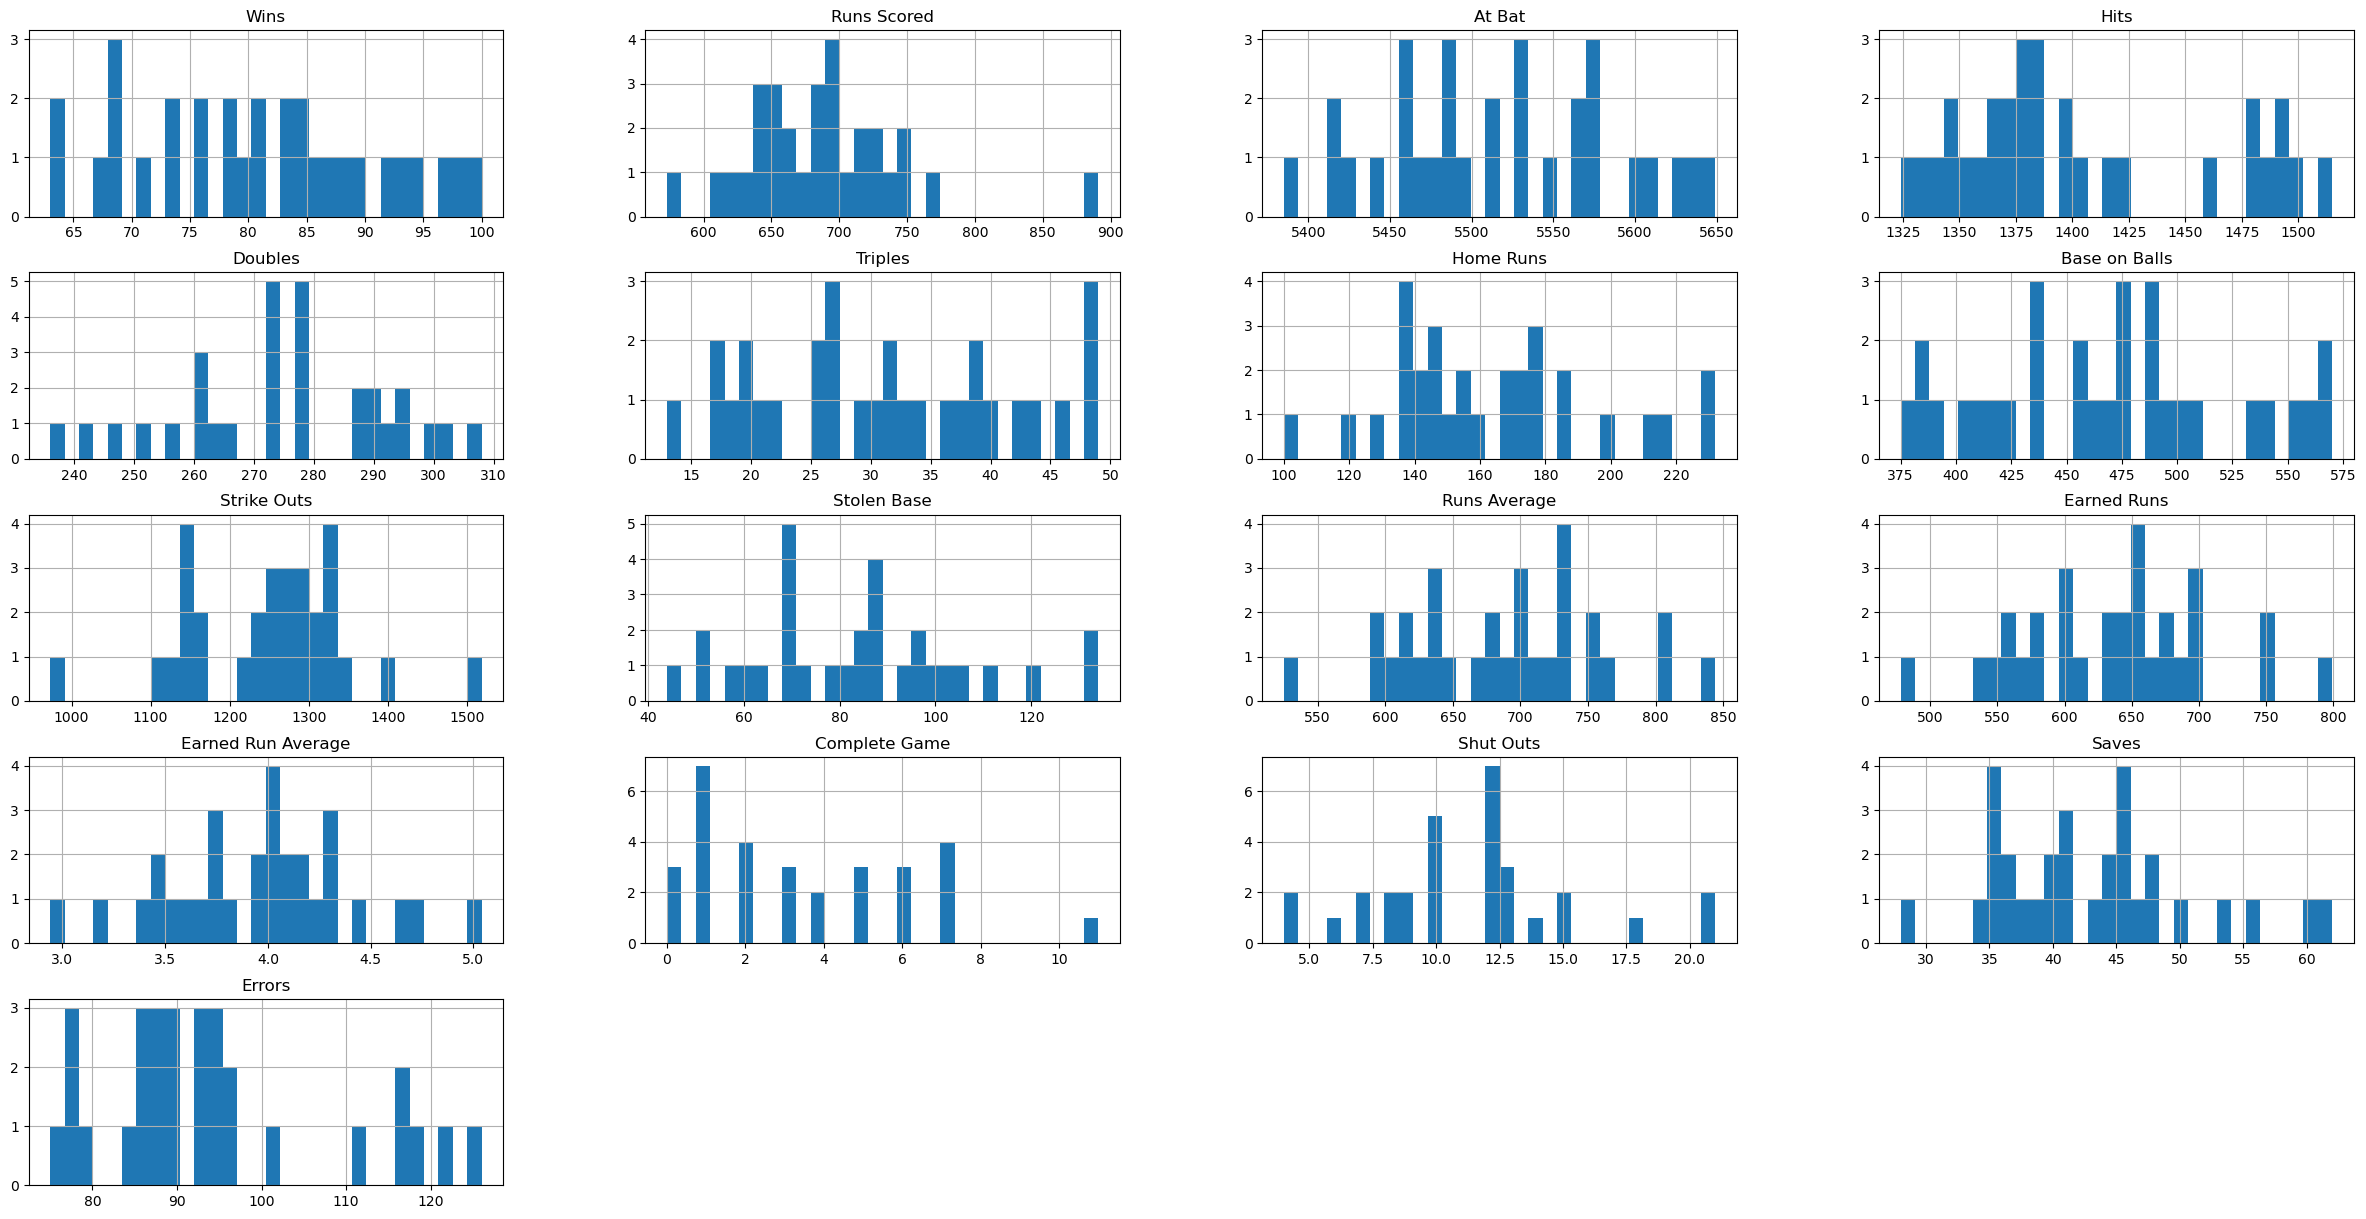

In [15]:
df.hist(bins=30,figsize=(30,15))

Checking the Skewness in the dataset

In [16]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

<Axes: xlabel='Runs Scored', ylabel='Hits'>

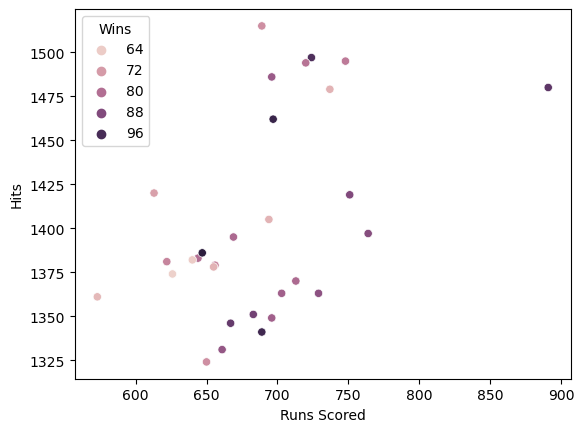

In [17]:
sns.scatterplot(x=df['Runs Scored'],y=df['Hits'],hue=df['Wins'])

<Axes: xlabel='Runs Scored', ylabel='At Bat'>

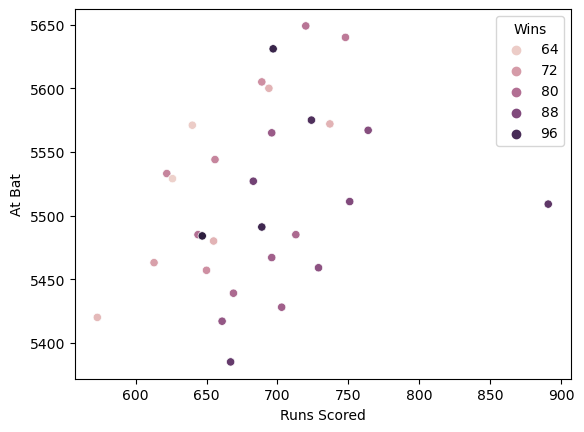

In [18]:
sns.scatterplot(x=df['Runs Scored'],y=df['At Bat'],hue=df['Wins'])

<Axes: xlabel='Runs Scored', ylabel='Strike Outs'>

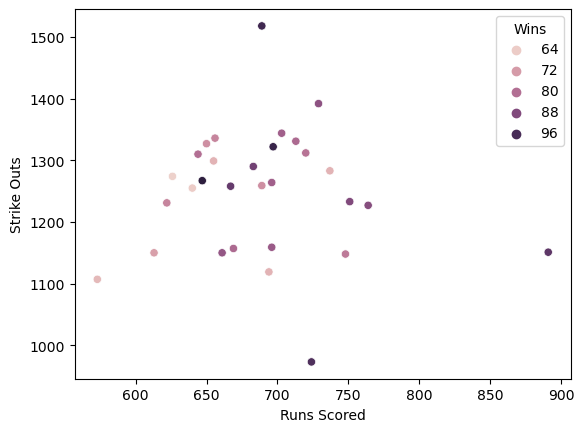

In [19]:
sns.scatterplot(x=df['Runs Scored'],y=df['Strike Outs'],hue=df['Wins'])

<Axes: xlabel='Wins', ylabel='Runs Scored'>

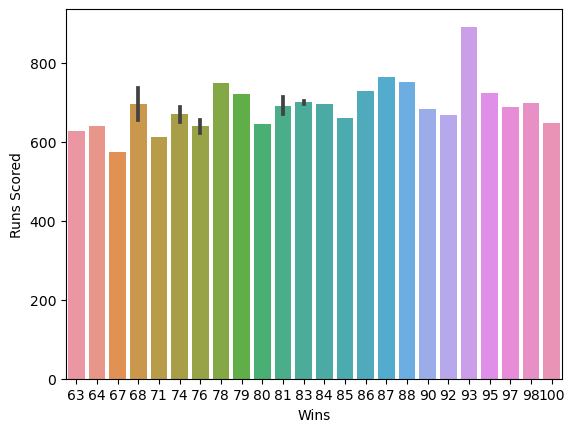

In [20]:
sns.barplot(x='Wins',y='Runs Scored',data=df)

<Axes: xlabel='Wins', ylabel='Runs Average'>

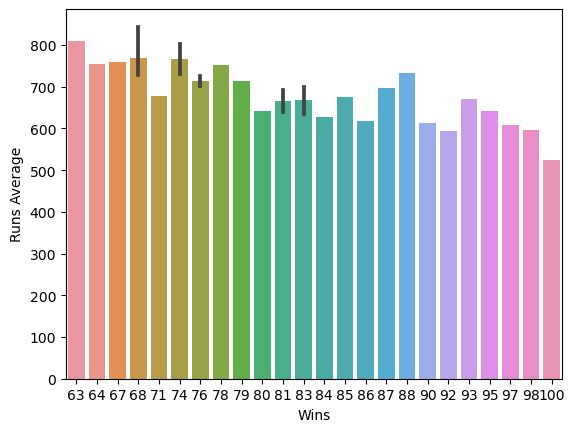

In [21]:
sns.barplot(x='Wins',y='Runs Average',data=df)

Implementing Machine Learning

In [22]:
x=df.iloc[:,1:16]
y=df.iloc[:,0]

In [23]:
x

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40


In [24]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: Wins, dtype: int64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 15)
(9, 15)
(21,)
(9,)


In [27]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [28]:
LR.coef_

array([ 9.69784375e-02, -3.28627877e-02,  3.01483407e-02, -9.66590646e-02,
        1.55174670e-01, -9.84814092e-03, -1.17277625e-02,  3.08028891e-03,
       -1.28478696e-02,  9.52985581e-02,  1.57147925e-01, -5.24323117e+01,
        6.47321595e-01,  7.10599715e-02,  7.78073060e-01])

In [29]:
LR.intercept_

185.09156595710834

In [30]:
LR.score(x_train,y_train)

0.9767675933270503

In [31]:
 LRpred=LR.predict(x_test)
print("Predicted value", LRpred)
print("Actual value", y_test)

Predicted value [ 84.32896277 104.30067451  65.89973876  95.67011793  91.42888373
  78.10533244  76.8687775   59.22059104  81.79907749]
Actual value 27     79
15    100
23     67
17     97
8      80
9      78
28     74
24     63
12     85
Name: Wins, dtype: int64


In [32]:
print('Mean Squared Error:', MSE(y_test, LRpred))
print('Mean Absolute Error:', MAE(y_test, LRpred))
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, LRpred)))
print('R2 Score:', r2_score(y_test, LRpred))

Mean Squared Error: 23.69588958216119
Mean Absolute Error: 3.715900637918788
Root Mean Squared Error: 4.867842394959104
R2 Score: 0.8240404238948427


After getting the above results we got to know that the root mean squared error is 4.86 which means the model is good at pedictions.

Using Random Forest Regressor

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 15)
(6, 15)
(24,)
(6,)


In [34]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
rf.score(x_train,y_train)

0.9062963683156992

In [37]:
new=rf.predict(x_test)
print("Predicted value", new)
print("Actual value", y_test)

Predicted value [78.89 85.85 74.28 88.77 85.16 78.2 ]
Actual value 27     79
15    100
23     67
17     97
8      80
9      78
Name: Wins, dtype: int64


In [38]:
print('Mean Squared Error:', MSE(y_test, new))
print('Mean Absolute Error:', MAE(y_test, new))
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, new)))
print('R2 Score:', r2_score(y_test, new))

Mean Squared Error: 57.938583333333376
Mean Absolute Error: 5.855000000000001
Root Mean Squared Error: 7.611739836156604
R2 Score: 0.559681443951868


After getting the above results we got to know that the root mean squared error is 7.6 which means the model is good at pedictions.